In [19]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np

import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian
import model_graddesc as model

torch.set_default_tensor_type(torch.DoubleTensor)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0.,0.])
o2 = torch.tensor([10.,0.])
origin = [o1,o2]
r1 = 2
r2 = 1
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
source = mm.multipleCircles(origin, radius, nb_pts)

origin_target = [[10., 0.], [0, 5.]]
target = mm.multipleCircles(origin_target, radius, nb_pts)


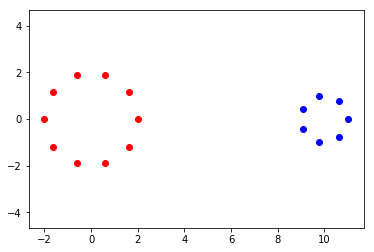

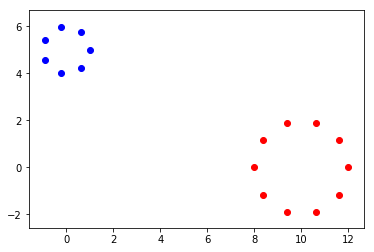

In [21]:
plt.figure()
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')
plt.axis('equal')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [22]:
# Defining the deformation modules
sigma1 = 20
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=source[0].view(-1))
trans1 = dm.deformationmodules.GlobalTranslation(manifold1, sigma1)
trans1.fill_controls_zero()
#trans1 = dm.deformationmodules.Translations(manifold1, sigma1)
mod1 = dm.deformationmodules.CompoundModule([trans1])

sigma2 = 20
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=source[1].view(-1))
trans2 = dm.deformationmodules.GlobalTranslation(manifold2, sigma2)
trans2.fill_controls_zero()
#trans2 = dm.deformationmodules.Translations(manifold2, sigma2)
mod2 = dm.deformationmodules.CompoundModule([trans2])

module_list = [mod1, mod2]
sigma_bg = 1.
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

In [23]:
constr_Id = dm.constraints.Identity_Silent()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [24]:
# set parameters
reg_param = 10**-3 

gd0_tensor = torch.cat([source[0], source[1], source[0], source[1]],0).requires_grad_().view(-1)
mom0_tensor = torch.zeros(gd0_tensor.shape).requires_grad_().view(-1)
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
    
EnergyFunctional = model.EnergyFunctional(modules, H, constr_Id, source, target, dim, reg_param)

# do registration
X = [gd0_tensor, mom0_tensor]
X = model.gradientdescent(EnergyFunctional, X)

cost: 0.0 attach: 61.203175517181876
 iter : 0  ,total energy: 61.203175517181876
cost: 0.0 attach: 61.203175517181876
cost: 0.000319960962128 attach: 59.62892726987724
c 0
 iter : 0  ,total energy: 59.62924723083937
cost: 0.000319960962128 attach: 59.62892726987724
cost: 0.0015479142853 attach: 57.74059727969572
c 0
 iter : 1  ,total energy: 57.742145193981024
cost: 0.0015479142853 attach: 57.74059727969572
cost: 0.00423515947112 attach: 55.475706638119334
c 0
 iter : 2  ,total energy: 55.479941797590456
cost: 0.00423515947112 attach: 55.475706638119334
cost: 0.00920468496979 attach: 52.759430042725015
c 0
 iter : 3  ,total energy: 52.7686347276948
cost: 0.00920468496979 attach: 52.759430042725015
cost: 0.0176720004647 attach: 49.50227420395113
c 0
 iter : 4  ,total energy: 49.51994620441578
cost: 0.0176720004647 attach: 49.50227420395113
cost: 0.0312332675776 attach: 45.60102937603723
c 0
 iter : 5  ,total energy: 45.63226264361484
cost: 0.0312332675776 attach: 45.60102937603723
cost

cost: 0.310253907986 attach: 14.324480720151527
cost: 0.313241119524 attach: 14.22326204269446
c 0
 iter : 39  ,total energy: 14.536503162218187
cost: 0.313241119524 attach: 14.22326204269446
cost: 0.312321122025 attach: 14.170905321936852
c 0
 iter : 40  ,total energy: 14.483226443962154
cost: 0.312321122025 attach: 14.170905321936852
cost: 0.314988154031 attach: 14.135511100548525
c 0
 iter : 41  ,total energy: 14.450499254580022
cost: 0.314988154031 attach: 14.135511100548525
cost: 0.311607584072 attach: 14.237996618285555
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: False
c 1
 iter : 42  ,total energy: 14.549604202357784
cost: 0.314988154031 attach: 14.135511100548525
cost: 0.313155663974 attach: 14.079291001333955
c 0
 iter : 43  ,total energy: 14.392446665307665
cost: 0.313155663974 attach: 14.079291001333955
cost: 0.3158962

cost: 0.31635837723 attach: 13.821738056959692
cost: 0.316229120338 attach: 13.816798957071576
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 67  ,total energy: 14.13302807740914
cost: 0.316229120338 attach: 13.816798957071576
cost: 0.316428002047 attach: 13.817365989446131
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 1
 iter : 68  ,total energy: 14.133793991493214
cost: 0.316229120338 attach: 13.816798957071576
cost: 0.316328378661 attach: 13.81374308203334
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition

cost: 0.31644275059 attach: 13.800281691445685
cost: 0.316432837939 attach: 13.79986441750339
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 91  ,total energy: 14.116297255442097
cost: 0.316432837939 attach: 13.79986441750339
cost: 0.316446977363 attach: 13.799913864630653
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 1
 iter : 92  ,total energy: 14.116360841993997
cost: 0.316432837939 attach: 13.79986441750339
cost: 0.316439906736 attach: 13.799653574211467
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 

cost: 0.31644751597 attach: 13.798679201675021
cost: 0.316447288735 attach: 13.798664709535425
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 115  ,total energy: 14.115111998270281
cost: 0.316447288735 attach: 13.798664709535425
cost: 0.316448106331 attach: 13.798660576014736
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 116  ,total energy: 14.11510868234605
cost: 0.316448106331 attach: 13.798660576014736
cost: 0.316447043801 attach: 13.798694419210783
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condit

cost: 0.316448299306 attach: 13.798580764636467
cost: 0.316448283987 attach: 13.798579704007402
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 139  ,total energy: 14.11502798799438
cost: 0.316448283987 attach: 13.798579704007402
cost: 0.31644834109 attach: 13.79857931423902
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 140  ,total energy: 14.115027655328708
cost: 0.31644834109 attach: 13.79857931423902
cost: 0.316448266615 attach: 13.79858177216944
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 

cost: 0.316448359714 attach: 13.798573499930418
cost: 0.316448356554 attach: 13.798573438838675
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 0
 iter : 163  ,total energy: 14.11502179539294
cost: 0.316448356554 attach: 13.798573438838675
cost: 0.316448364727 attach: 13.798573555029476
Condition 0: tensor(1, dtype=torch.uint8)
Condition 1, 2, 3: tensor(1, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condition 5: True
c 1
 iter : 164  ,total energy: 14.115021919756575
cost: 0.316448356554 attach: 13.798573438838675
cost: 0.316448360641 attach: 13.798573327496637
Condition 0: tensor(0, dtype=torch.uint8)
Condition 1, 2, 3: tensor(0, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(0, dtype=torch.uint8)
Contition 4: tensor(0, dtype=torch.uint8)
Condi

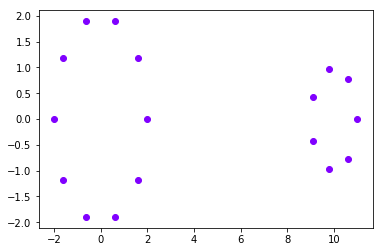

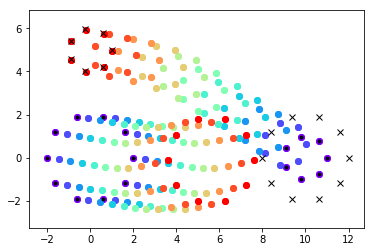

In [9]:
H.module.manifold.fill_gd(X[0])
H.module.manifold.fill_cotan(X[1])

states, controls = dm.shooting.shoot_euler(H, it=10)

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(states)))

plt.figure()
for s,c in zip(states, colors):
    plt.scatter(s[0][0].gd.view(-1,2)[:, 0].detach().numpy(), s[0][0].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
    plt.scatter(s[1][0].gd.view(-1,2)[:, 0].detach().numpy(), s[1][0].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
    plt.scatter(s[2][0].gd.view(-1,2)[:, 0].detach().numpy(), s[2][0].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
    plt.scatter(s[2][1].gd.view(-1,2)[:, 0].detach().numpy(), s[2][1].gd.view(-1,2)[:, 1].detach().numpy(), c=c)
plt.plot(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), 'xk')
plt.plot(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), 'xk')

plt.plot(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), '.k')
plt.plot(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), '.k')

    
plt.axis('equal')
plt.show()

In [10]:
# Visualization of grid deformation for each submodule
nx, ny = 30, 30
sx, sy = 30, 30
x, y = torch.meshgrid([torch.arange(0, nx), torch.arange(0, ny)])
x = sx*(x.type(torch.DoubleTensor)/nx - 0.5)
y = sy*(y.type(torch.DoubleTensor)/ny - 0.5)

gridpoints = dm.usefulfunctions.grid2vec(x, y).type(torch.DoubleTensor)


phi = mm.largeDeformation(modules, states, controls, gridpoints)
x1, y1 = dm.usefulfunctions.vec2grid(phi[0], nx, ny)
x2, y2 = dm.usefulfunctions.vec2grid(phi[1], nx, ny)
x3, y3 = dm.usefulfunctions.vec2grid(phi[2], nx, ny)



mm.plot_grid( x1.detach().numpy(), y1.detach().numpy(), color = 'blue')
mm.plot_grid(x2.detach().numpy(), y2.detach().numpy(), color = 'blue')
mm.plot_grid( x3.detach().numpy(), y3.detach().numpy(), color = 'blue')
plt.show()


AssertionError: 

In [18]:
def compute_deformation_grid(grid_origin, grid_size, grid_resolution, it=2, intermediate=False):
    x, y = torch.meshgrid([
        torch.linspace(grid_origin[0], grid_origin[0]+grid_size[0], grid_resolution[0]),
        torch.linspace(grid_origin[1], grid_origin[1]+grid_size[1], grid_resolution[1])])

    gridpos = dm.usefulfunctions.grid2vec(x, y)

    grid_landmarks = dm.manifold.Landmarks(2, gridpos.shape[0], gd=gridpos.view(-1))
    grid_silent = dm.manifold.SilentPoints(grid_landmarks)

    intermediate = shoot(Hamiltonian([grid_silent, modules]))

    return dm.usefulfunctions.vec2grid(grid_landmarks.gd.view(-1, 2).detach(), grid_resolution[0], grid_resolution[1])

compute_deformation_grid(torch.tensor([-3.,-3.]), torch.tensor([15.,10.]), torch.Size([16,16]))

AttributeError: module 'defmod.manifold' has no attribute 'SilentPoints'